In [1]:
import swiftest
import numpy as np
import matplotlib.pyplot as plt

In [2]:
inparfile = 'param.swifter.in'
swiftersim = swiftest.Simulation(param_file=inparfile, codename="Swifter")
swiftersim.bin2xr()
swifterdat = swiftersim.ds

Reading Swifter file param.swifter.in
Reading in time 3.652e+04
Creating Dataset
Successfully converted 3653 output frames.
Swifter simulation data stored as xarray DataSet .ds


In [3]:
inparfile = 'param.swiftest.in'
swiftestsim = swiftest.Simulation(param_file=inparfile)
swiftestsim.bin2xr()
swiftestdat = swiftestsim.ds

Reading Swiftest file param.swiftest.in

Creating Dataset from NetCDF file
Successfully converted 3653 output frames.
Swiftest simulation data stored as xarray DataSet .ds


In [4]:
swiftdiff = swiftestdat - swifterdat

In [5]:
swiftdiff = swiftdiff.rename({'time' : 'time (d)'})

In [6]:
swiftdiff['rmag'] = np.sqrt(swiftdiff['xhx']**2 + swiftdiff['xhy']**2 + swiftdiff['xhz']**2)
swiftdiff['vmag'] = np.sqrt(swiftdiff['vhx']**2 + swiftdiff['vhy']**2 + swiftdiff['vhz']**2)

In [7]:
plidx = swiftdiff.id.values[swiftdiff.id.values < 9]
tpidx = swiftdiff.id.values[swiftdiff.id.values >=9]

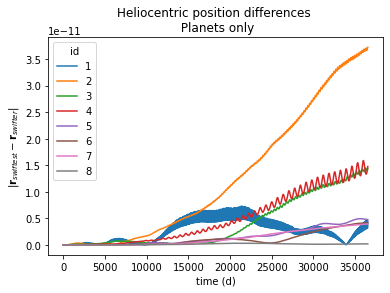

In [8]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Planets only")
fig.savefig("rmvs_swifter_comparison-8pl_16tp-planets-rmag.png", facecolor='white', transparent=False, dpi=300)

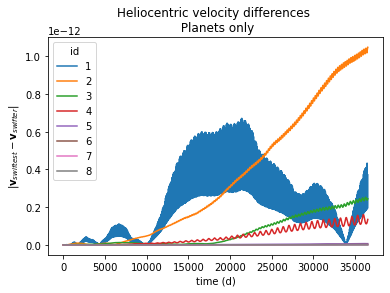

In [9]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=plidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Planets only")
fig.savefig("rmvs_swifter_comparison-8pl_16tp-planets-vmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


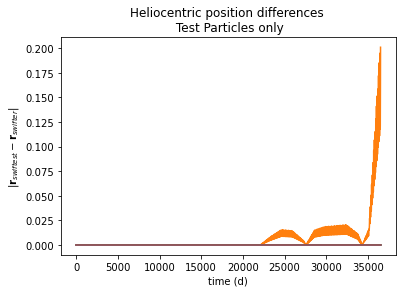

In [10]:
fig, ax = plt.subplots()
swiftdiff['rmag'].sel(id=tpidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{r}_{swiftest} - \mathbf{r}_{swifter}|$")
ax.set_title("Heliocentric position differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("rmvs_swifter_comparison-8pl_16tp-testparticles-rmag.png", facecolor='white', transparent=False, dpi=300)

No handles with labels found to put in legend.


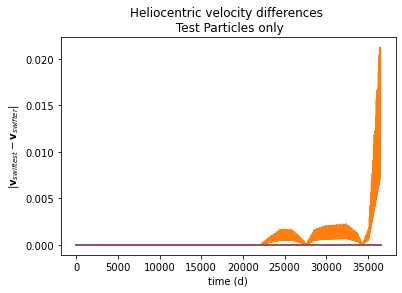

In [11]:
fig, ax = plt.subplots()
swiftdiff['vmag'].sel(id=tpidx).plot.line(ax=ax, x="time (d)")
ax.set_ylabel("$|\mathbf{v}_{swiftest} - \mathbf{v}_{swifter}|$")
ax.set_title("Heliocentric velocity differences \n Test Particles only")
legend = ax.legend()
legend.remove()
fig.savefig("rmvs_swifter_comparison-8pl_16tp-testparticles-vmag.png", facecolor='white', transparent=False, dpi=300)

In [12]:
swiftdiff = swiftdiff.rename({'time (d)' :'time'})

In [13]:
swiftdiff.sel(id=tpidx).isel(time=5)['xhz']

<xarray.DataArray 'xhz' (id: 16)>
array([ 0.00000000e+00, -1.30104261e-17,  0.00000000e+00,  2.60208521e-17,
       -2.03287907e-20, -6.77626358e-21,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00])
Coordinates:
  * id       (id) int64 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
    time     float64 50.0